In [37]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
def yes_no_to_bin(dataset: pd.DataFrame, colnames: list[str]):
    for col in colnames:
        dataset[col] = (dataset[col] == "YES").astype(int)

def n_from_10_to_n(dataset: pd.DataFrame, colnames: list[str]):
    """
    Converts "3 From 10" -> 3 (int)
    """
    for col in colnames:
        dataset[col] =  (dataset[col].str.replace(" From 10", "")).astype(int)

def to_dummies(dataset: pd.DataFrame, colnames: list[str]) -> pd.DataFrame:
    for col in colnames:
        dms = pd.get_dummies(dataset[col], prefix=col).astype(int)
        # dms.drop(columns=f"{col}_Seldom", inplace=True)
        dataset = pd.concat([dataset, dms], axis=1)

    dataset.drop(columns=colnames, inplace=True)
    return dataset

In [108]:
path = kagglehub.dataset_download("mdsultanulislamovi/mental-disorders-dataset")
print(path)
dataset = pd.read_csv(path + "/mental_disorders_dataset.csv")

yes_no_to_bin(dataset, [
    "Mood Swing",
    "Suicidal thoughts",
    "Anorxia",
    "Authority Respect",
    "Try-Explanation",
    "Aggressive Response",
    "Ignore & Move-On",
    "Nervous Break-down",
    "Admit Mistakes",
    "Overthinking",
])

n_from_10_to_n(dataset, [
    "Sexual Activity",
    "Concentration",
    "Optimisim",
])

dataset = to_dummies(dataset, [
    "Sadness",
    "Euphoric",
    "Exhausted",
    "Sleep dissorder",
])

dataset.to_csv(path + "/mental_disorders_dataset_encoded.csv", index=False)

dataset.info()

/home/dom/.cache/kagglehub/datasets/mdsultanulislamovi/mental-disorders-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient Number              120 non-null    object
 1   Mood Swing                  120 non-null    int64 
 2   Suicidal thoughts           120 non-null    int64 
 3   Anorxia                     120 non-null    int64 
 4   Authority Respect           120 non-null    int64 
 5   Try-Explanation             120 non-null    int64 
 6   Aggressive Response         120 non-null    int64 
 7   Ignore & Move-On            120 non-null    int64 
 8   Nervous Break-down          120 non-null    int64 
 9   Admit Mistakes              120 non-null    int64 
 10  Overthinking                120 non-null    int64 
 11  Sexual Activity             120 non-null    int64 
 12  Concentration  

In [101]:
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,0,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


(array([31.,  0.,  0., 31.,  0.,  0., 28.,  0.,  0., 30.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

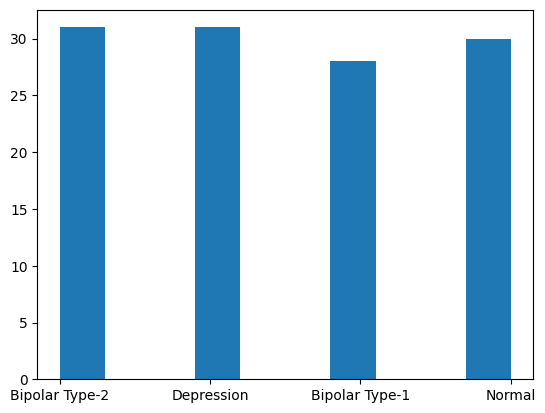

In [76]:
plt.hist(dataset["Expert Diagnose"])

(array([42.,  0.,  0., 42.,  0.,  0., 16.,  0.,  0., 20.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

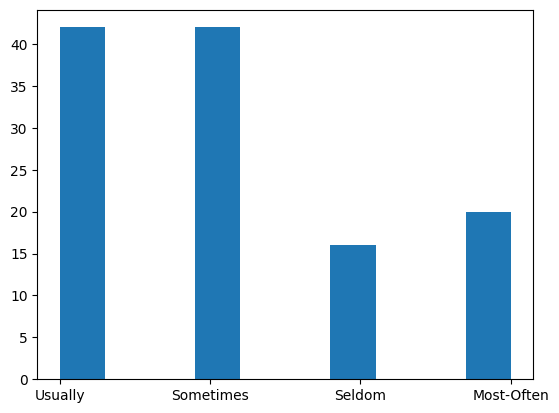

In [77]:
plt.hist(dataset["Sadness"])

(array([46.,  0.,  0.,  9.,  0.,  0., 20.,  0.,  0., 45.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

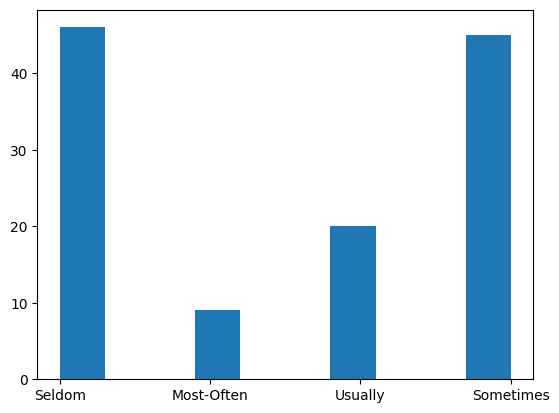

In [78]:
plt.hist(dataset["Euphoric"])

(array([38.,  0.,  0., 34.,  0.,  0., 18.,  0.,  0., 30.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

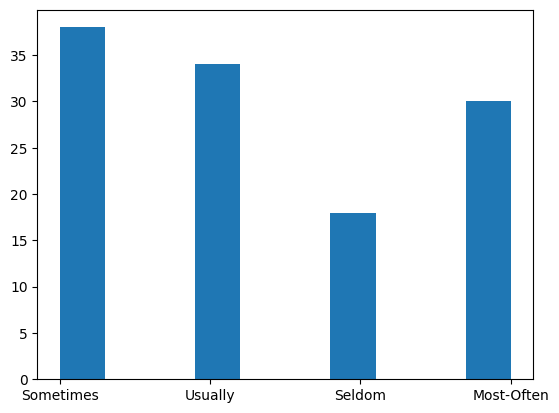

In [79]:
plt.hist(dataset["Exhausted"])

(array([44.,  0.,  0., 21.,  0.,  0., 34.,  0.,  0., 21.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

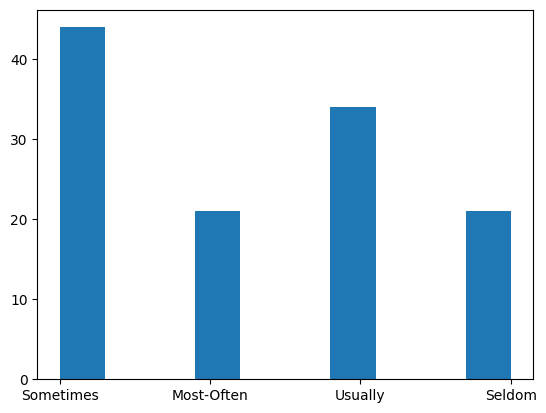

In [80]:
plt.hist(dataset["Sleep dissorder"])